# Forecasting sunspot activity

Our telecommunications company is rolling out a new service, this causes additional load to our network, so we have to rely more on satellite based communication services. According to the transmission technology department, "space weather" can have a fundamental influence on our satellite based services, so we have to evaluate the risks. Space weather is strongly influenced by the sunspot activity of our Sun, so accurate forecasting of the activity can be highly valuable.

More information on the phenomena itself can be found [here](https://en.wikipedia.org/wiki/Sunspot#Application).

## Primary datasource

During modeling we use the [Sunspot Index and Long-term Solar Observations](http://www.sidc.be/silso/datafiles) dataset.

Monthly mean total sunspot number data [here](http://www.sidc.be/silso/INFO/snmtotcsv.php)

Attached description [here](http://www.sidc.be/silso/infosnmtot)

Daily total sunspot number data [here](http://www.sidc.be/silso/INFO/sndtotcsv.php)

Attached description [here](http://www.sidc.be/silso/infosndtot)


## Monthly modeling

### Task 1

Download and load the dataset into a DataFrame (make use of the description of the dataset!).

In [ ]:
!wget -O sunspot.csv http://www.sidc.be/silso/INFO/snmtotcsv.php

--2021-08-01 19:47:56--  http://www.sidc.be/silso/INFO/snmtotcsv.php
Resolving www.sidc.be (www.sidc.be)... 193.190.230.45
Connecting to www.sidc.be (www.sidc.be)|193.190.230.45|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://wwwbis.sidc.be/silso/INFO/snmtotcsv.php [following]
--2021-08-01 19:47:56--  https://wwwbis.sidc.be/silso/INFO/snmtotcsv.php
Resolving wwwbis.sidc.be (wwwbis.sidc.be)... 193.190.230.16
Connecting to wwwbis.sidc.be (wwwbis.sidc.be)|193.190.230.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘sunspot.csv’

sunspot.csv             [  <=>               ] 121.38K   347KB/s    in 0.4s    

2021-08-01 19:47:57 (347 KB/s) - ‘sunspot.csv’ saved [124298]



In [ ]:
import pandas as pd

df = pd.read_csv("sunspot.csv", sep=";", header=None)
df

,0,1,2,3,4,5,6
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3266,2021,3,2021.204,17.2,6.2,1322,1
3267,2021,4,2021.286,24.5,6.8,1277,0
3268,2021,5,2021.371,21.2,5.4,1237,0
3269,2021,6,2021.453,25.4,5.6,1196,0


In [ ]:
df["date"] = df[0].astype(str)+"-"+df[1].astype(str)
df["date"] = df.date.astype('datetime64[ns]')
df.drop(columns=[0,1,2,4,5,6], inplace=True)
df = df.set_index("date")
df.rename(columns={3:"sunspots"},inplace=True)
df

,sunspots
date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7
...,...
2021-03-01,17.2
2021-04-01,24.5
2021-05-01,21.2


### Task 2:

Do "explorative" analysis on the data, produce basic descriptors and graphs, describe its basic features.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


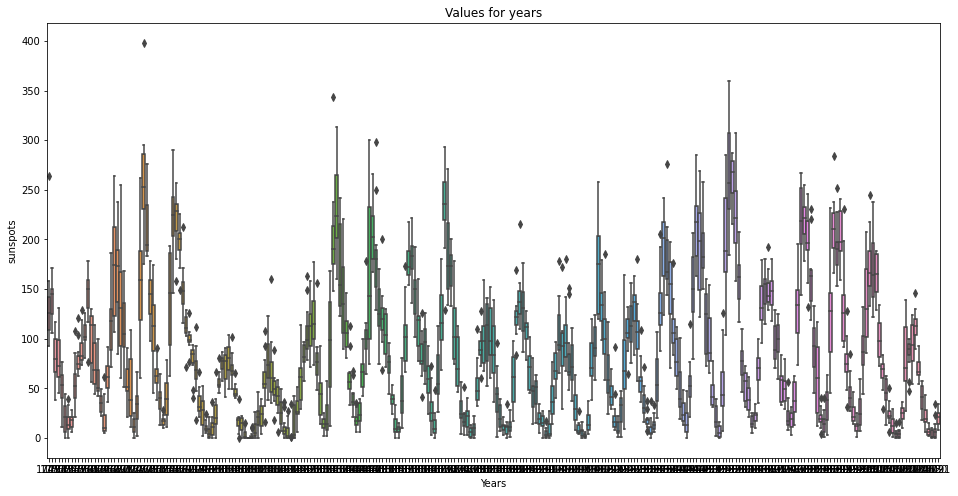

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(16, 8))

sns.boxplot(df.index.year, df.sunspots)
plt.title("Values for years")
plt.xlabel("Years")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


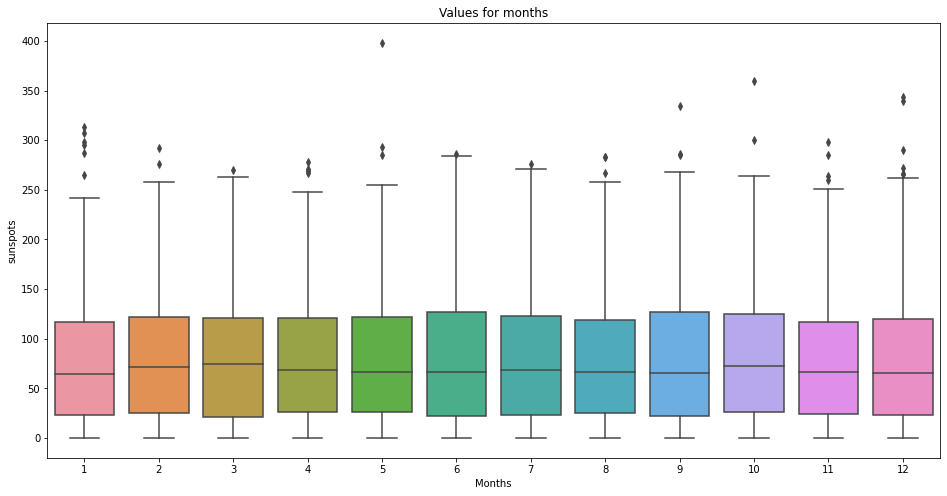

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(16, 8))

sns.boxplot(df.index.month, df.sunspots)
plt.title("Values for months")
plt.xlabel("Months")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["sunspots"].values)

print('p-value: %f' % result[1])



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


p-value: 0.000000


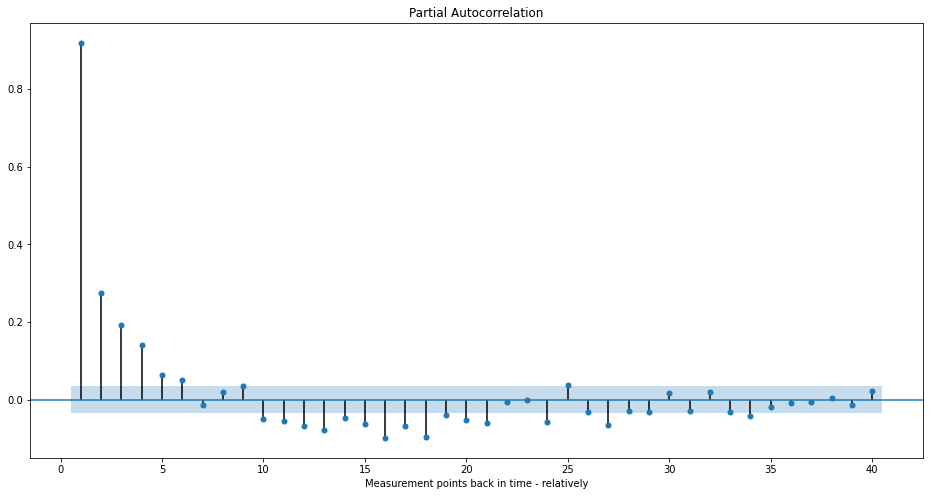

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, ax = plt.subplots(figsize=(16,8))

plot_pacf(df["sunspots"].values, lags=40, zero=False, ax=ax)
plt.xlabel("Measurement points back in time - relatively")

plt.show()

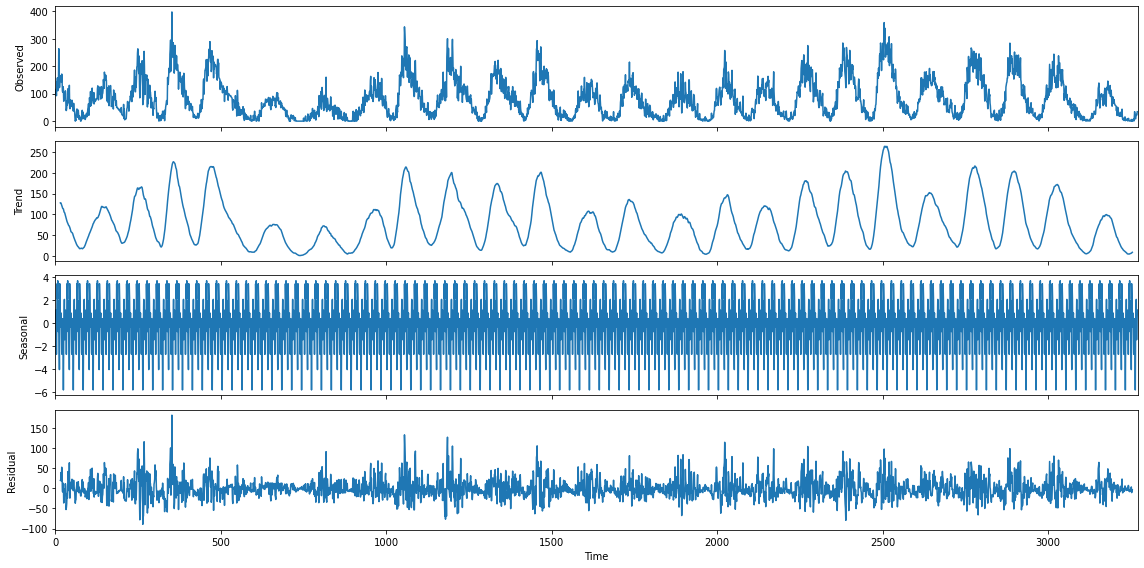

In [ ]:
from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl
with mpl.rc_context():
    mpl.rc("figure", figsize=(16,8))
    
    analysis = seasonal_decompose(df["sunspots"].values,model="additive", freq=30)

    analysis.plot()
    plt.show()

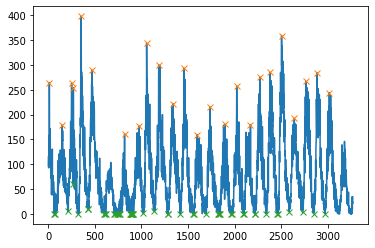

In [ ]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(df["sunspots"].values, prominence=150)
lows, _ = find_peaks(df["sunspots"].values*-1.0, prominence=150)


plt.plot(df.sunspots.values)
plt.plot(peaks, df.sunspots.values[peaks], "x")
plt.plot(lows, df.sunspots.values[lows], "x")

At first glance, it seems that we have a nice stationary data, although there are even minor signs above time, window 30, but it might be worth pulling the maximum there.
It also seems that we would have something to look for with some Fourier-type method, we could try to analyze the periods with this. Nevertheless, let us now stick to what we have done so far, use linear, then autoregressive, and then more complex models.

### Task 3

Split the data, for the modeling.

In [ ]:
from sklearn.model_selection import train_test_split
# !!! shuffle = False !!!
train_data, test_data = train_test_split(df[["sunspots"]], test_size=0.05, shuffle=False)

We now decide to use 5% of the data to check the stability of our results. That's little - in return it runs fast. The issue of overfitting / validation discussed in more detail in the previous lecture. Here we only use train-body division here, which is __NOT__ best practice.

### Task 4

Fit a basic linear regression model on the data.

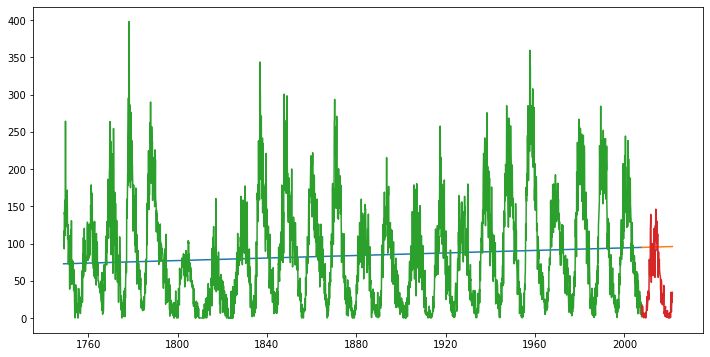

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model= LinearRegression()
lin_model.fit(train_data.index.astype("int64").values.reshape(-1, 1),train_data["sunspots"].values)#

train_fit = lin_model.predict(train_data.index.astype("int64").values.reshape(-1, 1))
train_fit = pd.Series(train_fit)
train_fit.index =train_data.index

prediction = lin_model.predict(test_data.index.astype("int64").values.reshape(-1, 1))
prediction = pd.Series(prediction)
prediction.index =test_data.index


fig, ax = plt.subplots(figsize=(12,6))
plt.plot(train_fit)
plt.plot(prediction)

plt.plot(train_data["sunspots"])

plt.plot(test_data["sunspots"])

plt.show()

# Task 5

Use an autoregressive model for forecasting, evaluate its performance (ARIMA).

Note: using tqdm is an elegant thing, it automatically generates a progressbar based on the cycle ...

In [ ]:
from tqdm.notebook import trange

from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

history = [x for x in list(train_data["sunspots"].values.astype("float"))]
predictions = list()

print("Prediction with ARIMA:\n")

# Step by step we walked around the testset
for t in trange(len(list(test_data["sunspots"].values.astype("float")))):
    # Model initialize
    model = ARIMA(history, order=(5,0,0))
    model_fit = model.fit(disp=0)
    # Prediction a time period
    output = model_fit.forecast()
    # Collecting
    yhat = output[0]
    predictions.append(yhat)
    
    # One step further
    obs = list(test_data["sunspots"].values.astype("float"))[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))



Prediction with ARIMA:



Why not use 30 AR? Because that is very slow. Check it with 5 and after that if there are some results, use the 30.


Mean abs error: 9.803939471009981
Explained variance: 0.8757815404918444


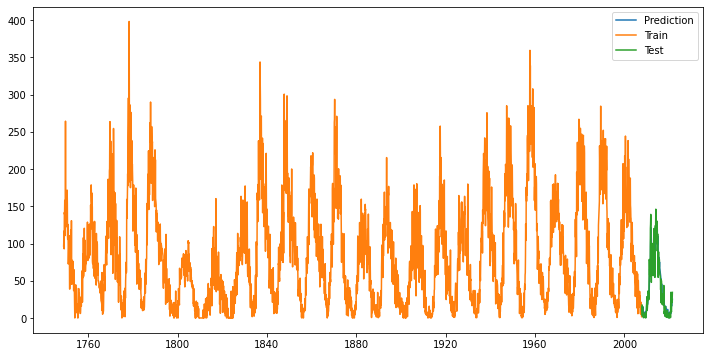

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, explained_variance_score
# Error analysis
    
errors = np.array(test_data["sunspots"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["sunspots"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["sunspots"].values,predictions))

predictions = pd.Series(predictions)
predictions.index =test_data.index    

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(predictions, label="Prediction")

plt.plot(train_data["sunspots"], label="Train")

plt.plot(test_data["sunspots"], label="Test")
plt.legend()
plt.show()

# Task 6

Apply complex modeling method, maximize predictive performance!

“Make a rolling window after shifting the variable by 1 to have X and y” is a very frustrating activity by manually. This should not be done manually, not least because of possible sources of error.

This is where [seglearn](https://dmbee.github.io/seglearn/index.html) comes into, which does it all for us.

In [ ]:
!pip install seglearn

     |████████████████████████████████| 11.3 MB 17.2 MB/s 


In [ ]:
TIME_WINDOW=30
FORECAST_DISTANCE=1

In [ ]:
from seglearn.transform import SegmentXYForecast, last

segmenter = SegmentXYForecast(width=TIME_WINDOW, step=1, y_func=last, forecast=FORECAST_DISTANCE)

X_train_rolled, y_train_rolled,_=segmenter.fit_transform([train_data.sunspots],[train_data.sunspots])

In [ ]:
X_train_rolled.shape, y_train_rolled.shape

((3077, 30), (3077,))

In [ ]:
assert X_train_rolled[1,-1] == y_train_rolled[0]

As evidenced by the above assumption (since it did not run for exception), the rolling window +1 forecast works well, as the y after the first window creeps to the last position of the second window. 

And if it’s already that nice: grab a random forest regression and fit it to the data!

In [ ]:
from sklearn.ensemble import RandomForestRegressor

N_ESTIMATORS = 30
RANDOM_STATE = 452543634

RF_base_model = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=N_ESTIMATORS, n_jobs=-1)

RF_base_model.fit(X_train_rolled,y_train_rolled)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=452543634, verbose=0, warm_start=False)

In [ ]:
X_test_rolled, y_test_rolled,_=segmenter.fit_transform([test_data.sunspots],[test_data.sunspots])

RF_model_predictions = RF_base_model.predict(X_test_rolled)

print()
print("Mean abs error:",mean_absolute_error(y_test_rolled,RF_model_predictions))
print("Explained variance:",explained_variance_score(y_test_rolled,RF_model_predictions))


Mean abs error: 11.850398009950247
Explained variance: 0.8331099574411274


Well, the lesson is that even trees are not omnipotent. So we will stay with ARIMA for now.